In [1]:
import torch
from torch import nn
# Checking for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
# Loading  the dataset (Download and Extract)
import zipfile
import urllib.request

url = "https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip"
zip_path = "data.zip"
csv_filename = "synchronous machine.csv"

# Downloading dataset
urllib.request.urlretrieve(url, zip_path)

# Unzipping file
with zipfile.ZipFile(zip_path, 'r') as my_zip:
    my_zip.extractall()

In [3]:
import pandas as pd
import numpy as np

# Read CSV with proper delimiter and thousands separator
data = pd.read_csv(csv_filename, delimiter=";", thousands=',')
print(data.describe())
print(data.columns)

               Iy          PF           e         dIf           If
count  557.000000  557.000000  557.000000  557.000000   557.000000
mean    39.763016   73.238779   15.838420  317.050269  1364.861759
std     15.785814   26.405977   10.966386  201.304856   490.655197
min      3.000000    1.000000    0.000000    1.000000    14.000000
25%     34.000000   69.000000    5.000000  151.000000  1331.000000
50%     43.000000   79.000000   15.000000  315.000000  1495.000000
75%     52.000000   89.000000   25.000000  471.000000  1651.000000
max     59.000000   99.000000   35.000000  769.000000  1949.000000
Index(['Iy', 'PF', 'e', 'dIf', 'If'], dtype='object')


In [4]:
#converting dataframe into numpy_data
numpy_data = data.values

#shape of data 
numpy_data.shape, numpy_data[:10]

((557, 5),
 array([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        [   3,   72,   28,  338, 1518],
        [   3,   74,   26,  317, 1497],
        [   3,   76,   24,  301, 1481],
        [   3,   78,   22,   29,  147],
        [   3,    8,    2,   28,  146],
        [   3,   82,   18,   25,  143],
        [   3,   84,   16,  221, 1401]], dtype=int64))

In [5]:
import pandas as pd
import numpy as np

# Read CSV with proper delimiter and thousands separator
data = pd.read_csv(csv_filename, delimiter=";", thousands=',')
print(data.describe())
print(data.columns)

               Iy          PF           e         dIf           If
count  557.000000  557.000000  557.000000  557.000000   557.000000
mean    39.763016   73.238779   15.838420  317.050269  1364.861759
std     15.785814   26.405977   10.966386  201.304856   490.655197
min      3.000000    1.000000    0.000000    1.000000    14.000000
25%     34.000000   69.000000    5.000000  151.000000  1331.000000
50%     43.000000   79.000000   15.000000  315.000000  1495.000000
75%     52.000000   89.000000   25.000000  471.000000  1651.000000
max     59.000000   99.000000   35.000000  769.000000  1949.000000
Index(['Iy', 'PF', 'e', 'dIf', 'If'], dtype='object')


In [6]:
#converting dataframe into numpy_data
numpy_data = data.values

#shape of data 
numpy_data.shape, numpy_data[:10]

((557, 5),
 array([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        [   3,   72,   28,  338, 1518],
        [   3,   74,   26,  317, 1497],
        [   3,   76,   24,  301, 1481],
        [   3,   78,   22,   29,  147],
        [   3,    8,    2,   28,  146],
        [   3,   82,   18,   25,  143],
        [   3,   84,   16,  221, 1401]], dtype=int64))

In [7]:
# Converting numpy data to PyTorch tensor
original_data_tensor = torch.tensor(numpy_data, dtype=torch.float32).to(device)
original_data_tensor.shape, original_data_tensor[:10]

(torch.Size([557, 5]),
 tensor([[   3.,   66.,   34.,  383., 1563.],
         [   3.,   68.,   32.,  372., 1552.],
         [   3.,    7.,    3.,   36.,  154.],
         [   3.,   72.,   28.,  338., 1518.],
         [   3.,   74.,   26.,  317., 1497.],
         [   3.,   76.,   24.,  301., 1481.],
         [   3.,   78.,   22.,   29.,  147.],
         [   3.,    8.,    2.,   28.,  146.],
         [   3.,   82.,   18.,   25.,  143.],
         [   3.,   84.,   16.,  221., 1401.]]))

In [8]:
# a. Create pi tensor with 3.142 values
dataset_size = original_data_tensor.shape
my_pi_tensor = torch.full(dataset_size, 3.142, device=device)
my_pi_tensor[:10], my_pi_tensor.device, my_pi_tensor.dtype

(tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
         [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]]),
 device(type='cpu'),
 torch.float32)

In [9]:
# Fifth root of sum of my_pi_tensor
fifth_root = torch.sum(my_pi_tensor).pow(1/5)
fifth_root.item()

6.143364429473877

In [10]:
#  Creating my_data_tensor 
my_data_tensor = torch.cat([original_data_tensor[:100], original_data_tensor[-100:]])
my_data_tensor.shape

torch.Size([200, 5])

In [11]:
# Extracting Features and Target
features = my_data_tensor[:, 3]  # dIf (Change in excitation current) is the fourth column from our data features as viewed using pandas
target = my_data_tensor[:, 4]  # If (Excitation current) is the fifth/last column from our data features as viewed using pandas
print(features.shape, target.shape)
features[:10], target[:10]

torch.Size([200]) torch.Size([200])


(tensor([383., 372.,  36., 338., 317., 301.,  29.,  28.,  25., 221.]),
 tensor([1563., 1552.,  154., 1518., 1497., 1481.,  147.,  146.,  143., 1401.]))

In [12]:
# Reshape to 2D
target = target.unsqueeze(1)
features = features.unsqueeze(1)
print(features.shape, target.shape)
features[:2], target[:2]

torch.Size([200, 1]) torch.Size([200, 1])


(tensor([[383.],
         [372.]]),
 tensor([[1563.],
         [1552.]]))

In [13]:
#  Splitting data into Training (75%) and Test (25%)
train_size = int(0.75 * len(features))
X_train, y_train = features[:train_size], target[:train_size]
X_test, y_test = features[train_size:], target[train_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(150, 50, 150, 50)

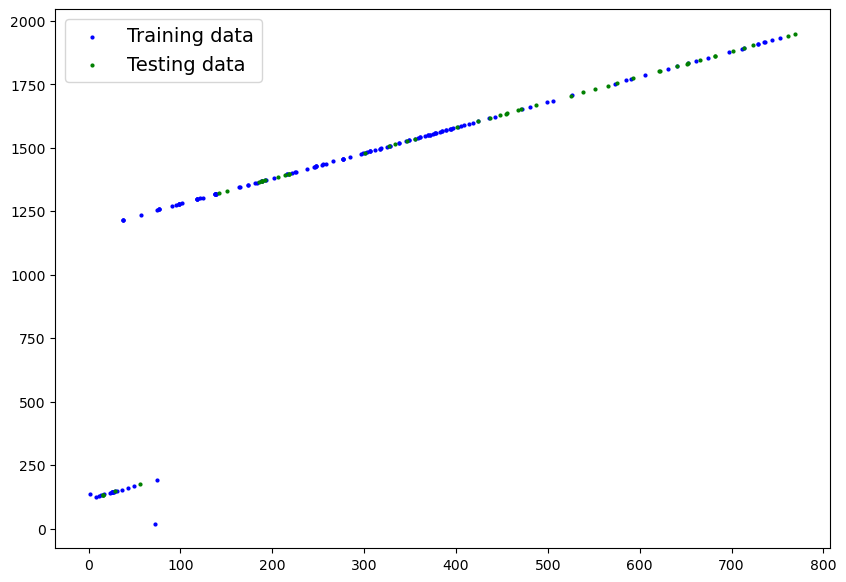

In [14]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test)

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # the linear regression formula (y = m*x + b) where m=self.weights and b=self.bais
     

In [16]:
torch.manual_seed(42)

model_ = LinearRegressionModel()

model_.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
#move model to preffered device 
model_.to(device) 
next(model_.parameters()).device

device(type='cpu')

In [18]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer with learning rate 0.01
optimizer = torch.optim.Adam(params=model_.parameters(),lr=0.01)

In [19]:
torch.manual_seed(42)

# Setting the number of epochs to 300
epochs = 5000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


 # Putting data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    ### Training
    model_.train()

    # 1. Forward pass
    y_pred = model_(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Put the model in evaluation mode
    model_.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))


     # Print out what's happening
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
          

Epoch: 0 | MAE Train Loss: 1233.6229248046875 | MAE Test Loss: 1339.9893798828125 
Epoch: 100 | MAE Train Loss: 948.3297729492188 | MAE Test Loss: 931.329833984375 
Epoch: 200 | MAE Train Loss: 663.0368041992188 | MAE Test Loss: 522.670166015625 
Epoch: 300 | MAE Train Loss: 504.6107177734375 | MAE Test Loss: 353.3076171875 
Epoch: 400 | MAE Train Loss: 454.6542053222656 | MAE Test Loss: 390.256591796875 
Epoch: 500 | MAE Train Loss: 427.6521301269531 | MAE Test Loss: 463.95733642578125 
Epoch: 600 | MAE Train Loss: 423.26202392578125 | MAE Test Loss: 497.8829040527344 
Epoch: 700 | MAE Train Loss: 423.00927734375 | MAE Test Loss: 499.82501220703125 
Epoch: 800 | MAE Train Loss: 422.743896484375 | MAE Test Loss: 500.658203125 
Epoch: 900 | MAE Train Loss: 422.4660949707031 | MAE Test Loss: 500.68878173828125 
Epoch: 1000 | MAE Train Loss: 422.1759948730469 | MAE Test Loss: 500.3833923339844 
Epoch: 1100 | MAE Train Loss: 421.8868103027344 | MAE Test Loss: 500.0268859863281 
Epoch: 1200

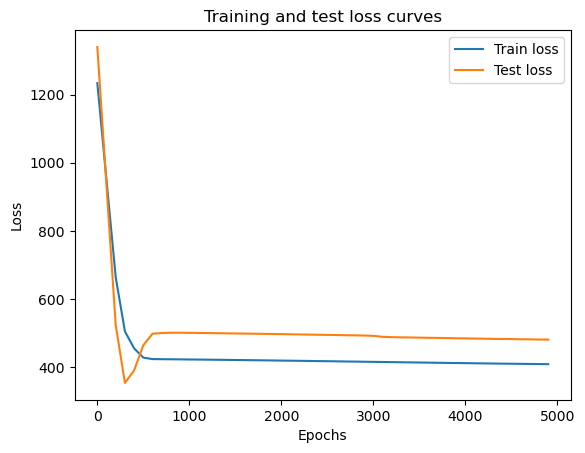

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
from sklearn.metrics import r2_score
with torch.inference_mode():
      # 1. Forward pass on test data
    test_pred = model_(X_test)
    print("Model accuracy: ",r2_score(test_pred,y_test))

Model accuracy:  0.5798492783833392


### COMMENT
Using the r2_score from sklearn library the accuracy of the model was found to be 58%, having test different learning rate the best learning rate was found as 0.001. looking back at the model traing the following are suggested to improve the accuracy of your model
1. The model should be trained on more features, the dataset had four features but only one was use to train the model, incorporating the remaining features to train the model will improve the model accuracy
2. Increasing the number of epochs: From the MAE loss it could be observed that as the epochs increases the model performs better
3. Scaling: Also on my own personal note, i think scaling of the features using either mormalization or standardization could increases the model performance.